**Important**: Click on "*Kernel*" > "*Restart Kernel and Clear All Outputs*" *before* reading this chapter in [JupyterLab <img height="12" style="display: inline-block" src="static/link_to_jp.png">](https://jupyterlab.readthedocs.io/en/stable/) (e.g., in the cloud on [MyBinder <img height="12" style="display: inline-block" src="static/link_to_mb.png">](https://mybinder.org/v2/gh/webartifex/intro-to-python/master?urlpath=lab/tree/07_sequences_00_content.ipynb))

# Chapter 7: Sequential Data

We studied numbers (cf., [Chapter 5 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/05_numbers_00_content.ipynb)) and textual data (cf., [Chapter 6 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/06_text_00_content.ipynb)) first mainly because objects of the presented data types are "simple." That is so for two reasons: First, they are *immutable*, and, as we saw in the "*Who am I? And how many?*" section in [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Who-am-I?-And-how-many?), mutable objects can quickly become hard to reason about. Second, they are "flat" in the sense that they are *not* composed of other objects.

The `str` type is a bit of a corner case in this regard. While one could argue that a longer `str` object, for example, `"text"`, is composed of individual characters, this is *not* the case in memory as the literal `"text"` only creates *one* object (i.e., one "bag" of $0$s and $1$s modeling all characters).

This chapter, [Chapter 8 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/08_mfr_00_content.ipynb), and [Chapter 9 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/09_mappings_00_content.ipynb) introduce various "complex" data types. While some are mutable and others are not, they all share that they are primarily used to "manage," or structure, the memory in a program (i.e., they provide references to other objects). Unsurprisingly, computer scientists refer to the ideas behind these data types as **[data structures <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Data_structure)**.

In this chapter, we focus on data types that model all kinds of sequential data. Examples of such data are [spreadsheets <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Spreadsheet) or [matrices <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Matrix_%28mathematics%29) and [vectors <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Vector_%28mathematics_and_physics%29). These formats share the property that they are composed of smaller units that come in a sequence of, for example, rows/columns/cells or elements/entries.

## Collections vs. Sequences

[Chapter 6 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/06_text_00_content.ipynb#A-"String"-of-Characters) already describes the **sequence** properties of `str` objects. In this section, we take a step back and study these properties one by one.

The [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) defines a variety of **abstract base classes** (ABCs). We saw ABCs already in [Chapter 5 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/05_numbers_00_content.ipynb#The-Numerical-Tower), where we use the ones from the [numbers <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/numbers.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) to classify Python's numeric data types according to mathematical ideas. Now, we take the ABCs from the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module to classify the data types in this chapter according to their behavior in various contexts.

As an illustration, consider `numbers` and `text` below, two objects of *different* types.

In [1]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]
text = "Lorem ipsum dolor sit amet."

Among others, one commonality between the two is that we may loop over them with the `for` statement. So, in the context of iteration, both exhibit the *same* behavior.

In [2]:
for number in numbers:
    print(number, end=" ")

7 11 8 5 3 12 2 6 9 10 1 4 

In [3]:
for character in text:
    print(character, end=" ")

L o r e m   i p s u m   d o l o r   s i t   a m e t . 

In [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#Containers-vs.-Iterables), we referred to such types as *iterables*. That is *not* a proper [English](https://dictionary.cambridge.org/spellcheck/english-german/?q=iterable) word, even if it may sound like one at first sight. Yet, it is an official term in the Python world formalized with the `Iterable` ABC in the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module.

For the data science practitioner, it is worthwhile to know such terms as, for example, the documentation on the [built-ins <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html) uses them extensively: In simple words, any built-in that takes an argument called "*iterable*" may be called with *any* object that supports being looped over. Already familiar [built-ins <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html) include [enumerate() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#enumerate), [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum), or [zip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#zip). So, they do *not* require the argument to be of a certain data type (e.g., `list`); instead, any *iterable* type works.

In [4]:
import collections.abc as abc

In [5]:
abc.Iterable

collections.abc.Iterable

As seen in [Chapter 5 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/05_numbers_00_content.ipynb#Goose-Typing), we can use ABCs with the built-in [isinstance() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#isinstance) function to check if an object supports a behavior.

So, let's "ask" Python if it can loop over `numbers` or `text`.

In [6]:
isinstance(numbers, abc.Iterable)

True

In [7]:
isinstance(text, abc.Iterable)

True

Contrary to `list` or `str` objects, numeric objects are *not* iterable.

In [8]:
isinstance(999, abc.Iterable)

False

Instead of asking, we could try to loop over `999`, but this results in a `TypeError`.

In [9]:
for digit in 999:
    print(digit)

TypeError: 'int' object is not iterable

Most of the data types in this and the next chapter exhibit three [orthogonal <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Orthogonality) (i.e., "independent") behaviors, formalized by ABCs in the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module as:
- `Iterable`: An object may be looped over.
- `Container`: An object "contains" references to other objects; a "whole" is composed of many "parts."
- `Sized`: The number of references to other objects, the "parts," is *finite*.

The characteristical operation supported by `Container` types is the `in` operator for membership testing.

In [10]:
0 in numbers

False

In [11]:
"l" in text

True

Alternatively, we could also check if `numbers` and `text` are `Container` types with [isinstance() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#isinstance).

In [12]:
isinstance(numbers, abc.Container)

True

In [13]:
isinstance(text, abc.Container)

True

Numeric objects do *not* "contain" references to other objects, and that is why they are considered "flat" data types. The `in` operator raises a `TypeError`. Conceptually speaking, Python views numeric types as "wholes" without any "parts."

In [14]:
isinstance(999, abc.Container)

False

In [15]:
9 in 999

TypeError: argument of type 'int' is not iterable

Analogously, being `Sized` types, we can pass `numbers` and `text` as the argument to the built-in [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) function and obtain "meaningful" results. The exact meaning depends on the data type: For `numbers`, [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) tells us how many elements are in the `list` object; for `text`, it tells us how many [Unicode characters <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Unicode) make up the `str` object. *Abstractly* speaking, both data types exhibit the *same* behavior of *finiteness*.

In [16]:
len(numbers)

12

In [17]:
len(text)

27

In [18]:
isinstance(numbers, abc.Sized)

True

In [19]:
isinstance(text, abc.Sized)

True

On the contrary, even though `999` consists of three digits for humans, numeric objects in Python have no concept of a "size" or "length," and the [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) function raises a `TypeError`.

In [20]:
isinstance(999, abc.Sized)

False

In [21]:
len(999)

TypeError: object of type 'int' has no len()

These three behaviors are so essential that whenever they coincide for a data type, it is called a **collection**, formalized with the `Collection` ABC. That is where the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module got its name from: It summarizes all ABCs related to collections; in particular, it defines a hierarchy of specialized kinds of collections.

Without going into too much detail, one way to read the summary table at the beginning of the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module's documention is as follows: The first column, titled "ABC", lists all collection-related ABCs in Python. The second column, titled "Inherits from," indicates if the idea behind the ABC is *original* (e.g., the first row with the `Container` ABC has an empty "Inherits from" column) or a *combination* (e.g., the row with the `Collection` ABC has `Sized`, `Iterable`, and `Container` in the "Inherits from" column). The third and fourth columns list the methods that come with a data type following an ABC. We keep ignoring the methods named in the dunder style for now.

So, let's confirm that both `numbers` and `text` are collections.

In [22]:
isinstance(numbers, abc.Collection)

True

In [23]:
isinstance(text, abc.Collection)

True

They share one more common behavior: When looping over them, we can *predict* the *order* of the elements or characters. The ABC in the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module corresponding to this behavior is `Reversible`. While sounding unintuitive at first, it is evident that if something is reversible, it must have a forward order, to begin with.

The [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) built-in allows us to loop over the elements or characters in reverse order.

In [24]:
for number in reversed(numbers):
    print(number, end=" ")

4 1 10 9 6 2 12 3 5 8 11 7 

In [25]:
for character in reversed(text):
    print(character, end=" ")

. t e m a   t i s   r o l o d   m u s p i   m e r o L 

In [26]:
isinstance(numbers, abc.Reversible)

True

In [27]:
isinstance(text, abc.Reversible)

True

Collections that exhibit this fourth behavior are referred to as **sequences**, formalized with the `Sequence` ABC in the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module.

In [28]:
isinstance(numbers, abc.Sequence)

True

In [29]:
isinstance(text, abc.Sequence)

True

Most of the data types introduced in the remainder of this chapter are sequences. Nevertheless, we also look at some data types that are neither collections nor sequences but still useful to model sequential data in practice.

In Python-related documentations, the terms collection and sequence are heavily used, and the data science practitioner should always think of them in terms of the three or four behaviors they exhibit.

Data types that are collections but not sequences are covered in [Chapter 9 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/09_mappings_00_content.ipynb).

## The `list` Type

As already seen multiple times, to create a `list` object, we use the *literal notation* and list all elements within brackets `[` and `]`.

In [30]:
empty = []

In [31]:
simple = [40, 50]

The elements do *not* need to be of the *same* type, and `list` objects may also be **nested**.

In [32]:
nested = [empty, 10, 20.0, "Thirty", simple]

[PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=empty%20%3D%20%5B%5D%0Asimple%20%3D%20%5B40,%2050%5D%0Anested%20%3D%20%5Bempty,%2010,%2020.0,%20%22Thirty%22,%20simple%5D&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows how `nested` holds references to the `empty` and `simple` objects. Technically, it holds three more references to the `10`, `20.0`, and `"Thirty"` objects as well. However, to simplify the visualization, these three objects are shown right inside the `nested` object. That may be done because they are immutable and "flat" data types. In general, the $0$s and $1$s inside a `list` object in memory always constitute references to other objects only.

In [33]:
nested

[[], 10, 20.0, 'Thirty', [40, 50]]

Let's not forget that `nested` is an object on its own with an *identity* and *data type*.

In [34]:
id(nested)

140483818052016

In [35]:
type(nested)

list

Alternatively, we use the built-in [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) constructor to create a `list` object out of any (finite) *iterable* we pass to it as the argument.

For example, we can wrap the [range() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-range) built-in with [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list): As described in [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#Containers-vs.-Iterables), `range` objects, like `range(1, 13)` below, are iterable and generate `int` objects "on the fly" (i.e., one by one). The [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) around it acts like a `for`-loop and **materializes** twelve `int` objects in memory that then become the elements of the newly created `list` object. [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=r%20%3D%20range%281,%2013%29%0Al%20%3D%20list%28range%281,%2013%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows this difference visually.

In [36]:
list(range(1, 13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Beware of passing a `range` object over a "big" horizon as the argument to [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) as that may lead to a `MemoryError` and the computer crashing.

In [37]:
list(range(999_999_999_999))

MemoryError: 

As another example, we create a `list` object from a `str` object, which is iterable, as well. Then, the individual characters become the elements of the new `list` object!

In [38]:
list("iterable")

['i', 't', 'e', 'r', 'a', 'b', 'l', 'e']

### Sequence Behaviors

`list` objects are *sequences*. To reiterate that, we briefly summarize the *four* behaviors of a sequence and provide some more `list`-specific details below:

- `Container`:
 - holds references to other objects in memory (with their own *identity* and *type*)
 - implements membership testing via the `in` operator
- `Iterable`:
 - supports being looped over
 - works with the `for` or `while` statements
- `Reversible`:
 - the elements come in a *predictable* order that we may loop over in a forward or backward fashion
 - works with the [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) built-in
- `Sized`:
 - the number of elements is finite *and* known in advance
 - works with the built-in [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) function

The "length" of `nested` is *five* because `empty` and `simple` count as *one* element each. In other words, `nested` holds five references to other objects, two of which are `list` objects.

In [39]:
len(nested)

5

With a `for`-loop, we can iterate over all elements in a *predictable* order, forward or backward. As `list` objects hold *references* to other *objects*, these have an *indentity* and may even be of *different* types; however, the latter observation is rarely, if ever, useful in practice.

In [40]:
for element in nested:
    print(str(element).ljust(10), str(id(element)).ljust(18), type(element))

[]         140483817280848    <class 'list'>
10         94627844305984     <class 'int'>
20.0       140483817093232    <class 'float'>
Thirty     140483698711280    <class 'str'>
[40, 50]   140483698705104    <class 'list'>


In [41]:
for element in reversed(nested):
    print(element, end="     ")

[40, 50]     Thirty     20.0     10     []     

The `in` operator checks if a given object is "contained" in a `list` object. It uses the `==` operator behind the scenes (i.e., *not* the `is` operator) conducting a **[linear search <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Linear_search)**: So, Python implicitly loops over *all* elements and only stops prematurely if an element evaluates equal to the searched object. A linear search may, therefore, be relatively *slow* for big `list` objects.

In [42]:
10 in nested

True

`20` compares equal to the `20.0` in `nested`.

In [43]:
20 in nested

True

In [44]:
30 in nested

False

### Indexing

Because of the *predictable* order and the *finiteness*, each element in a sequence can be labeled with a unique *index*, an `int` object in the range $0 \leq \text{index} < \lvert \text{sequence} \rvert$.

Brackets, `[` and `]`, are the literal syntax for accessing individual elements of any sequence type. In this book, we also call them the *indexing operator* in this context.

In [45]:
nested[0]

[]

The last index is one less than `len(nested)`, and Python raises an `IndexError` if we look up an index that is not in the range.

In [46]:
nested[5]

IndexError: list index out of range

Negative indices are used to count in reverse order from the end of a sequence, and brackets may be chained to access nested objects. So, to access the `50` inside `simple` via the `nested` object, we write `nested[-1][1]`.

In [47]:
nested[-1]

[40, 50]

In [48]:
nested[-1][1]

50

### Slicing

Slicing `list` objects works analogously to slicing `str` objects: We use the literal syntax with either one or two colons `:` inside the brackets `[]` to separate the *start*, *stop*, and *step* values. Slicing creates a *new* `list` object with the elements chosen from the original one.

For example, to obtain the three elements in the "middle" of `nested`, we slice from `1` (including) to `4` (excluding).

In [49]:
nested[1:4]

[10, 20.0, 'Thirty']

To obtain "every other" element, we slice from beginning to end, defaulting to `0` and `len(nested)` when omitted, in steps of `2`.

In [50]:
nested[::2]

[[], 20.0, [40, 50]]

The literal notation with the colons `:` is *syntactic sugar*. It saves us from using the [slice() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#slice) built-in to create `slice` objects. [slice() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#slice) takes *start*, *stop*, and *step* arguments in the same way as the familiar [range() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-range), and the `slice` objects it creates are used just as *indexes* above.

In most cases, the literal notation is more convenient to use; however, with `slice` objects, we can give names to slices and reuse them across several sequences.

In [51]:
middle = slice(1, 4)

In [52]:
type(middle)

slice

In [53]:
nested[middle]

[10, 20.0, 'Thirty']

In [54]:
numbers[middle]

[11, 8, 5]

In [55]:
text[middle]

'ore'

`slice` objects come with three read-only attributes `start`, `stop`, and `step` on them.

In [56]:
middle.start

1

In [57]:
middle.stop

4

If not passed to [slice() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#slice), these attributes default to `None`. That is why the cell below has no output.

In [58]:
middle.step

A good trick to know is taking a "full" slice: This copies *all* elements of a `list` object into a *new* `list` object.

In [59]:
nested_copy = nested[:]

In [60]:
nested_copy

[[], 10, 20.0, 'Thirty', [40, 50]]

At first glance, `nested` and `nested_copy` seem to cause no pain. For `list` objects, the comparison operator `==` goes over the elements in both operands in a pairwise fashion and checks if they all evaluate equal (cf., the "*List Comparison*" section below for more details).

We confirm that `nested` and `nested_copy` compare equal as could be expected but also that they are *different* objects.

In [61]:
nested == nested_copy

True

In [62]:
nested is nested_copy

False

However, as [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=nested%20%3D%20%5B%5B%5D,%2010,%2020.0,%20%22Thirty%22,%20%5B40,%2050%5D%5D%0Anested_copy%20%3D%20nested%5B%3A%5D&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) reveals, only the *references* to the elements are copied, and not the objects in `nested` themselves! Because of that, `nested_copy` is a so-called **[shallow copy <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Object_copying#Shallow_copy)** of `nested`.

We could also see this with the [id() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#id) function: The respective first elements in both `nested` and `nested_copy` are the *same* object, namely `empty`.  So, we have three ways of accessing the *same* address in memory. Also, we say that `nested` and `nested_copy` partially share the *same* state.

In [63]:
nested[0] is nested_copy[0]

True

In [64]:
id(nested[0])

140483817280848

In [65]:
id(nested_copy[0])

140483817280848

Knowing this becomes critical if the elements in a `list` object are mutable objects (i.e., we can change them *in place*), and this is the case with `nested` and `nested_copy`, as we see in the next section on "*Mutability*".

As both the original `nested` object and its copy reference the *same* `list` objects in memory, any changes made to them are visible to both! Because of that, working with shallow copies can easily become confusing.

Instead of a shallow copy, we could also create a so-called **[deep copy <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Object_copying#Deep_copy)** of `nested`: Then, the copying process recursively follows every reference in a nested data structure and creates copies of *every* object found.

To explicitly create shallow or deep copies, the [copy <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/copy.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) provides two functions, [copy() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/copy.html#copy.copy) and [deepcopy() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/copy.html#copy.deepcopy). We must always remember that slicing creates *shallow* copies only.

In [66]:
import copy

In [67]:
nested_deep_copy = copy.deepcopy(nested)

In [68]:
nested == nested_deep_copy

True

Now, the first elements of `nested` and `nested_deep_copy` are *different* objects, and [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=import%20copy%0Anested%20%3D%20%5B%5B%5D,%2010,%2020.0,%20%22Thirty%22,%20%5B40,%2050%5D%5D%0Anested_deep_copy%20%3D%20copy.deepcopy%28nested%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows that there are *six* `list` objects in memory.

In [69]:
nested[0] is nested_deep_copy[0]

False

In [70]:
id(nested[0])

140483817280848

In [71]:
id(nested_deep_copy[0])

140483818059328

As this [StackOverflow question <img height="12" style="display: inline-block" src="static/link_to_so.png">](https://stackoverflow.com/questions/184710/what-is-the-difference-between-a-deep-copy-and-a-shallow-copy) shows, understanding shallow and deep copies is a common source of confusion independent of the programming language.

### Mutability

In contrast to `str` objects, `list` objects are *mutable*: We may assign new elements to indices or slices and also remove elements. That changes the *references* in a `list` object. In general, if an object is *mutable*, we say that it may be changed *in place*.

In [72]:
nested[0] = 0

In [73]:
nested

[0, 10, 20.0, 'Thirty', [40, 50]]

When we re-assign a slice, we can even change the size of the `list` object.

In [74]:
nested[:4] = [100, 100, 100]

In [75]:
nested

[100, 100, 100, [40, 50]]

In [76]:
len(nested)

4

The `list` object's identity does *not* change. That is the main point behind mutable objects.

In [77]:
id(nested)  # same memory location as before

140483818052016

`nested_copy` is unchanged!

In [78]:
nested_copy

[[], 10, 20.0, 'Thirty', [40, 50]]

Let's change the nested `[40, 50]` via `nested_copy` into `[1, 2, 3]` by replacing all its elements.

In [79]:
nested_copy[-1][:] = [1, 2, 3]

In [80]:
nested_copy

[[], 10, 20.0, 'Thirty', [1, 2, 3]]

That has a surprising side effect on `nested`.

In [81]:
nested

[100, 100, 100, [1, 2, 3]]

That is precisely the confusion we talked about above when we said that `nested_copy` is a *shallow* copy of `nested`. [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=nested%20%3D%20%5B%5B%5D,%2010,%2020.0,%20%22Thirty%22,%20%5B40,%2050%5D%5D%0Anested_copy%20%3D%20nested%5B%3A%5D%0Anested%5B%3A4%5D%20%3D%20%5B100,%20100,%20100%5D%0Anested_copy%5B-1%5D%5B%3A%5D%20%3D%20%5B1,%202,%203%5D&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows how both reference the *same* nested `list` object that is changed *in place* from `[40, 50]` into `[1, 2, 3]`.

Lastly, we use the `del` statement to remove an element.

In [82]:
del nested[-1]

In [83]:
nested

[100, 100, 100]

The `del` statement also works for slices. Here, we remove all references `nested` holds.

In [84]:
del nested[:]

In [85]:
nested

[]

Mutability for sequences is formalized by the `MutableSequence` ABC in the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module.

### List Methods

The `list` type is an essential data structure in any real-world Python application, and many typical `list`-related algorithms from computer science theory are already built into it at the C level (cf., the [documentation <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#mutable-sequence-types) or the [tutorial <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists) for a full overview; unfortunately, not all methods have direct links). So, understanding and applying the built-in methods of the `list` type not only speeds up the development process but also makes programs significantly faster.

In contrast to the `str` type's methods in [Chapter 6 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/06_text_00_content.ipynb#String-Methods) (e.g., [upper() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#str.upper) or [lower() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#str.lower)), the `list` type's methods that mutate an object do so *in place*. That means they *never* create *new* `list` objects and return `None` to indicate that. So, we must *never* assign the return value of `list` methods to the variable holding the list!

Let's look at the following `names` example.

In [86]:
names = ["Carl", "Peter"]

To add an object to the end of `names`, we use the `append()` method. The code cell shows no output indicating that `None` must be the return value.

In [87]:
names.append("Eckardt")

In [88]:
names

['Carl', 'Peter', 'Eckardt']

With the `extend()` method, we may also append multiple elements provided by an iterable. Here, the iterable is a `list` object itself holding two `str` objects.

In [89]:
names.extend(["Karl", "Oliver"])

In [90]:
names

['Carl', 'Peter', 'Eckardt', 'Karl', 'Oliver']

Similar to `append()`, we may add a new element at an arbitrary position with the `insert()` method. `insert()` takes two arguments, an *index* and the element to be inserted.

In [91]:
names.insert(1, "Berthold")

In [92]:
names

['Carl', 'Berthold', 'Peter', 'Eckardt', 'Karl', 'Oliver']

`list` objects may be sorted *in place* with the [sort() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#list.sort) method. That is different from the built-in [sorted() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sorted) function that takes any *finite* and *iterable* object and returns a *new* `list` object with the iterable's elements sorted!

In [93]:
sorted(names)

['Berthold', 'Carl', 'Eckardt', 'Karl', 'Oliver', 'Peter']

As the previous code cell created a *new* `list` object, `names` is still unsorted.

In [94]:
names

['Carl', 'Berthold', 'Peter', 'Eckardt', 'Karl', 'Oliver']

Let's sort the elements in `names` instead.

In [95]:
names.sort()

In [96]:
names

['Berthold', 'Carl', 'Eckardt', 'Karl', 'Oliver', 'Peter']

To sort in reverse order, we pass a keyword-only `reverse=True` argument to either the [sort() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#list.sort) method or the [sorted() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sorted) function.

In [97]:
names.sort(reverse=True)

In [98]:
names

['Peter', 'Oliver', 'Karl', 'Eckardt', 'Carl', 'Berthold']

The [sort() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#list.sort) method and the [sorted() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sorted) function sort the elements in `names` in alphabetical order, forward or backward. However, that does *not* hold in general.

We mention above that `list` objects may contain objects of *any* type and even of *mixed* types. Because of that, the sorting is **[delegated <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Delegation_(object-oriented_programming))** to the elements in a `list` object. In a way, Python "asks" the elements in a `list` object to sort themselves. As `names` contains only `str` objects, they are sorted according the the comparison rules explained in [Chapter 6 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/06_text_00_content.ipynb#String-Comparison).

To customize the sorting, we pass a keyword-only `key` argument to [sort() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#list.sort) or [sorted() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sorted), which must be a `function` object accepting *one* positional argument. Then, the elements in the `list` object are passed to that one by one, and the return values are used as the **sort keys**. The `key` argument is also a popular use case for `lambda` expressions.

For example, to sort `names` not by alphabet but by the names' lengths, we pass in a reference to the built-in [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) function as `key=len`. Note that there are *no* parentheses after `len`!

In [99]:
names.sort(key=len)

If two names have the same length, their relative order is kept as is. That is why `"Karl"` comes before `"Carl" ` below. A [sorting algorithm <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Sorting_algorithm) with that property is called **[stable <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Sorting_algorithm#Stability)**.

Sorting is an important topic in programming, and we refer to the official [HOWTO <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/howto/sorting.html) for a more comprehensive introduction.

In [100]:
names

['Karl', 'Carl', 'Peter', 'Oliver', 'Eckardt', 'Berthold']

`sort(reverse=True)` is different from the `reverse()` method. Whereas the former applies some sorting rule in reverse order, the latter simply reverses the elements in a `list` object.

In [101]:
names.reverse()

In [102]:
names

['Berthold', 'Eckardt', 'Oliver', 'Peter', 'Carl', 'Karl']

The `pop()` method removes the *last* element from a `list` object *and* returns it. Below we **capture** the `removed` element to show that the return value is not `None` as with all the methods introduced so far.

In [103]:
removed = names.pop()

In [104]:
removed

'Karl'

In [105]:
names

['Berthold', 'Eckardt', 'Oliver', 'Peter', 'Carl']

`pop()` takes an optional *index* argument and removes that instead.

So, to remove the second element, `"Eckhardt"`, from `names`, we write this.

In [106]:
removed = names.pop(1)

In [107]:
removed

'Eckardt'

In [108]:
names

['Berthold', 'Oliver', 'Peter', 'Carl']

Instead of removing an element by its index, we can also remove it by its value with the `remove()` method. Behind the scenes, Python then compares the object to be removed, `"Peter"` in the example, sequentially to each element with the `==` operator and removes the *first* one that evaluates equal to it. `remove()` does *not* return the removed element.

In [109]:
names.remove("Peter")

In [110]:
names

['Berthold', 'Oliver', 'Carl']

Also, `remove()` raises a `ValueError` if the value is not found.

In [111]:
names.remove("Peter")

ValueError: list.remove(x): x not in list

`list` objects implement an `index()` method that returns the position of the first element that compares equal to its argument. It fails *loudly* with a `ValueError` if no element compares equal.

In [112]:
names

['Berthold', 'Oliver', 'Carl']

In [113]:
names.index("Oliver")

1

In [114]:
names.index("Karl")

ValueError: 'Karl' is not in list

The `count()` method returns the number of elements that compare equal to its argument.

In [115]:
names.count("Carl")

1

In [116]:
names.count("Karl")

0

Two more methods, `copy()` and `clear()`, are *syntactic sugar* and replace working with slices.

`copy()` creates a *shallow* copy. So, `names.copy()` below does the same as taking a full slice with `names[:]`, and the caveats from above apply, too.

In [117]:
names_copy = names.copy()

In [118]:
names_copy

['Berthold', 'Oliver', 'Carl']

`clear()` removes all references from a `list` object. So, `names_copy.clear()` is the same as `del names_copy[:]`.

In [119]:
names_copy.clear()

In [120]:
names_copy

[]

Many methods introduced in this section are mentioned in the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module's documentation as well: While the `index()` and `count()` methods come with any data type that is a `Sequence`, the `append()`, `extend()`, `insert()`, `reverse()`, `pop()`, and `remove()` methods are part of any `MutableSequence` type. The `sort()`, `copy()`, and `clear()` methods are `list`-specific.

So, being a sequence does not only imply the four *behaviors* specified above, but also means that a data type comes with certain standardized methods.

### List Operations

As with `str` objects, the `+` and `*` operators are overloaded for concatenation and always return a *new* `list` object. The references in this newly created `list` object reference the *same* objects as the two original `list` objects. So, the same caveat as with *shallow* copies from above applies!

In [121]:
names

['Berthold', 'Oliver', 'Carl']

In [122]:
names + ["Diedrich", "Yves"]

['Berthold', 'Oliver', 'Carl', 'Diedrich', 'Yves']

In [123]:
2 * names

['Berthold', 'Oliver', 'Carl', 'Berthold', 'Oliver', 'Carl']

Besides being an operator, the `*` symbol has a second syntactical use, as explained in [PEP 3132 <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-3132/) and [PEP 448 <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-0448/): It implements what is called **iterable unpacking**. It is *not* an operator syntactically but a notation that Python reads as a literal.

In the example, Python interprets the expression as if the elements of the iterable `names` were placed between `"Achim"` and `"Xavier"` one by one. So, we do not obtain a nested but a *flat* list.

In [124]:
["Achim", *names, "Xavier"]

['Achim', 'Berthold', 'Oliver', 'Carl', 'Xavier']

Effectively, Python reads that as if we wrote the following.

In [125]:
["Achim", names[0], names[1], names[2], "Xavier"]

['Achim', 'Berthold', 'Oliver', 'Carl', 'Xavier']

#### List Comparison

The relational operators also work with `list` objects; yet another example of operator overloading.

Comparison is made in a pairwise fashion until the first pair of elements does not evaluate equal or one of the `list` objects ends. The exact comparison rules depend on the elements and not the `list` objects. As with [sort() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#list.sort) or [sorted() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sorted) above, comparison is *delegated* to the objects to be compared, and Python "asks" the elements in the two `list` objects to compare themselves. Usually, all elements are of the *same* type, and comparison is straightforward.

In [126]:
names

['Berthold', 'Oliver', 'Carl']

In [127]:
names == ["Berthold", "Oliver", "Carl"]

True

In [128]:
names != ["Berthold", "Oliver", "Karl"]

True

In [129]:
names < ["Berthold", "Oliver", "Karl"]

True

If two `list` objects have a different number of elements and all overlapping elements compare equal, the shorter `list` object is considered "smaller."

In [130]:
["Berthold", "Oliver"] < names < ["Berthold", "Oliver", "Carl", "Xavier"]

True

### Modifiers vs. Pure Functions

As `list` objects are mutable, the caller of a function can see the changes made to a `list` object passed to the function as an argument. That is often a surprising *side effect* and should be avoided.

As an example, consider the `add_xyz()` function.

In [131]:
letters = ["a", "b", "c"]

In [132]:
def add_xyz(arg):
    """Append letters to a list."""
    arg.extend(["x", "y", "z"])
    return arg

While this function is being executed, two variables, namely `letters` in the global scope and `arg` inside the function's local scope, reference the *same* `list` object in memory. Furthermore, the passed in `arg` is also the return value.

So, after the function call, `letters_with_xyz` and `letters` are **aliases** as well, referencing the *same* object. We can also visualize that with [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=letters%20%3D%20%5B%22a%22,%20%22b%22,%20%22c%22%5D%0A%0Adef%20add_xyz%28arg%29%3A%0A%20%20%20%20arg.extend%28%5B%22x%22,%20%22y%22,%20%22z%22%5D%29%0A%20%20%20%20return%20arg%0A%0Aletters_with_xyz%20%3D%20add_xyz%28letters%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false).

In [133]:
letters_with_xyz = add_xyz(letters)

In [134]:
letters_with_xyz

['a', 'b', 'c', 'x', 'y', 'z']

In [135]:
letters

['a', 'b', 'c', 'x', 'y', 'z']

A better practice is to first create a copy of `arg` within the function that is then modified and returned. If we are sure that `arg` contains immutable elements only, we get away with a shallow copy. The downside of this approach is the higher amount of memory necessary.

The revised `add_xyz()` function below is more natural to reason about as it does *not* modify the passed in `arg` internally. [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=letters%20%3D%20%5B%22a%22,%20%22b%22,%20%22c%22%5D%0A%0Adef%20add_xyz%28arg%29%3A%0A%20%20%20%20new_arg%20%3D%20arg%5B%3A%5D%0A%20%20%20%20new_arg.extend%28%5B%22x%22,%20%22y%22,%20%22z%22%5D%29%0A%20%20%20%20return%20new_arg%0A%0Aletters_with_xyz%20%3D%20add_xyz%28letters%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows that as well. This approach is following the **[functional programming <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Functional_programming)** paradigm that is going through a "renaissance" currently. Two essential characteristics of functional programming are that a function *never* changes its inputs and *always* returns the same output given the same inputs.

For a beginner, it is probably better to stick to this idea and not change any arguments as the original `add_xyz()` above. However, functions that modify and return the argument passed in are an important aspect of object-oriented programming, as explained in [Chapter 10 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/10_classes_00_content.ipynb).

In [136]:
letters = ["a", "b", "c"]

In [137]:
def add_xyz(arg):
    """Create a new list from an existing one."""
    new_arg = arg[:]
    new_arg.extend(["x", "y", "z"])
    return new_arg

In [138]:
letters_with_xyz = add_xyz(letters)

In [139]:
letters_with_xyz

['a', 'b', 'c', 'x', 'y', 'z']

In [140]:
letters

['a', 'b', 'c']

If we want to modify the argument passed in, it is best to return `None` and not `arg`, as does the final version of `add_xyz()` below. Then, the user of our function cannot accidentally create two aliases to the same object. That is also why the list methods above all return `None`. [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=letters%20%3D%20%5B%22a%22,%20%22b%22,%20%22c%22%5D%0A%0Adef%20add_xyz%28arg%29%3A%0A%20%20%20%20arg.extend%28%5B%22x%22,%20%22y%22,%20%22z%22%5D%29%0A%20%20%20%20return%0A%0Aadd_xyz%28letters%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows how there is only *one* reference to `letters` after the function call.

In [141]:
letters = ["a", "b", "c"]

In [142]:
def add_xyz(arg):
    """Append letters to a list."""
    arg.extend(["x", "y", "z"])
    return  # None

In [143]:
add_xyz(letters)

In [144]:
letters

['a', 'b', 'c', 'x', 'y', 'z']

If we call `add_xyz()` with `letters` as the argument again, we end up with an even longer `list` object.

In [145]:
add_xyz(letters)

In [146]:
letters

['a', 'b', 'c', 'x', 'y', 'z', 'x', 'y', 'z']

Functions that only work on the argument passed in are called **modifiers**. Their primary purpose is to change the **state** of the argument. On the contrary, functions that have *no* side effects on the arguments are said to be **pure**.

## The `tuple` Type

To create a `tuple` object, we can use the same literal notation as for `list` objects *without* the brackets and list all elements.

In [147]:
numbers = 7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4

In [148]:
numbers

(7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4)

However, to be clearer, many Pythonistas write out the optional parentheses `(` and `)`.

In [149]:
numbers = (7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4)

In [150]:
numbers

(7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4)

As before, `numbers` is an object on its own.

In [151]:
id(numbers)

140483698604784

In [152]:
type(numbers)

tuple

While we could use empty parentheses `()` to create an empty `tuple` object ...

In [153]:
empty_tuple = ()

In [154]:
empty_tuple

()

In [155]:
type(empty_tuple)

tuple

... we must use a *trailing comma* to create a `tuple` object holding one element. If we forget the comma, the parentheses are interpreted as the grouping operator and effectively useless!

In [156]:
one_tuple = (1,)  # we could ommit the parentheses but not the comma

In [157]:
one_tuple

(1,)

In [158]:
type(one_tuple)

tuple

In [159]:
no_tuple = (1)

In [160]:
no_tuple

1

In [161]:
type(no_tuple)

int

Alternatively, we may use the [tuple() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-tuple) built-in that takes any iterable as its argument and creates a new `tuple` from its elements.

In [162]:
tuple([1])

(1,)

In [163]:
tuple("iterable")

('i', 't', 'e', 'r', 'a', 'b', 'l', 'e')

### Tuples are like "Immutable Lists"

Most operations involving `tuple` objects work in the same way as with `list` objects. The main difference is that `tuple` objects are *immutable*. So, if our program does not depend on mutability, we may and should use `tuple` and not `list` objects to model sequential data. That way, we avoid the pitfalls seen above.

`tuple` objects are *sequences* exhibiting the familiar *four* behaviors. So, `numbers` holds a *finite* number of elements ...

In [164]:
len(numbers)

12

... that we can obtain individually by looping over it in a predictable *forward* or *reverse* order.

In [165]:
for number in numbers:
    print(number, end="   ")

7   11   8   5   3   12   2   6   9   10   1   4   

In [166]:
for number in reversed(numbers):
    print(number, end="   ")

4   1   10   9   6   2   12   3   5   8   11   7   

To check if a given object is *contained* in `numbers`, we use the `in` operator and conduct a linear search.

In [167]:
0 in numbers

False

In [168]:
1 in numbers

True

In [169]:
1.0 in numbers  # in relies on == behind the scenes

True

We may index and slice with the `[]` operator. The latter returns *new* `tuple` objects.

In [170]:
numbers[0]

7

In [171]:
numbers[-1]

4

In [172]:
numbers[6:]

(2, 6, 9, 10, 1, 4)

Index assignment does *not* work as tuples are *immutable* and results in a `TypeError`.

In [173]:
numbers[-1] = 99

TypeError: 'tuple' object does not support item assignment

The `+` and `*` operators work with `tuple` objects as well: They always create *new* `tuple` objects.

In [174]:
numbers + (99,) 

(7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4, 99)

In [175]:
2 * numbers

(7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4, 7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4)

Being immutable, `tuple` objects only provide the `count()` and `index()` methods of `Sequence` types. The `append()`, `extend()`, `insert()`, `reverse()`, `pop()`, and `remove()` methods of `MutableSequence` types are *not* available. The same holds for the `list`-specific methods `sort()`, `copy()`, and `clear()`.

In [176]:
numbers.count(0)

0

In [177]:
numbers.index(1)

10

The relational operators work in the *same* way as for `list` objects.

In [178]:
numbers

(7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4)

In [179]:
numbers == (7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4)

True

In [180]:
numbers != (99, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4)

True

In [181]:
numbers < (99, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4)

True

While `tuple` objects are immutable, this only relates to the references they hold. If a `tuple` object contains references to mutable objects, the entire nested structure is *not* immutable as a whole!

Consider the following stylized example `not_immutable`: It contains *three* elements, `1`, `[2, ..., 11]`, and `12`, and the elements of the nested `list` object may be changed. While it is not practical to mix data types in a `tuple` object that is used as an "immutable list," we want to make the point that the mere usage of the `tuple` type does *not* guarantee a nested object to be immutable as a whole.

In [182]:
not_immutable = (1, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 12)

In [183]:
not_immutable

(1, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 12)

In [184]:
not_immutable[1][:] = [99, 99, 99]

In [185]:
not_immutable

(1, [99, 99, 99], 12)

### Packing & Unpacking

In the "*List Operations*" section above, the `*` symbol **unpacks** the elements of a `list` object into another one. This idea of *iterable unpacking* is built into Python at various places, even *without* the `*` symbol.

For example, we may write variables on the left-hand side of a `=` statement in a `tuple` style. Then,  any *finite* iterable on the right-hand side is unpacked. So, `numbers` is unpacked into *twelve* variables below.

In [186]:
n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11, n12 = numbers

In [187]:
n1

7

In [188]:
n2

11

In [189]:
n3

8

Having to type twelve variables on the left is already tedious. Furthermore, if the iterable on the right yields a number of elements *different* from the number of variables, we get a `ValueError`.

In [190]:
n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11 = numbers

ValueError: too many values to unpack (expected 11)

In [191]:
n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11, n12, n13 = numbers

ValueError: not enough values to unpack (expected 13, got 12)

So, to make iterable unpacking useful, we prepend the `*` symbol to *one* of the variables on the left: That variable then becomes a `list` object holding the elements not captured by the other variables. We say that the excess elements from the iterable are **packed** into this variable.

For example, let's get the `first` and `last` element of `numbers` and collect the rest in `middle`.

In [192]:
first, *middle, last = numbers

In [193]:
first

7

In [194]:
middle  # always a list!

[11, 8, 5, 3, 12, 2, 6, 9, 10, 1]

In [195]:
last

4

We already used unpacking before this section without knowing it. Whenever we write a `for`-loop over the [zip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#zip) built-in, that generates a new `tuple` object in each iteration, which we unpack by listing several loop variables.

So, the `name, position` acts like a left-hand side of an `=` statement and unpacks the `tuple` objects generated from "zipping" the `names` list and the `positions` tuple together.

In [196]:
positions = ("goalkeeper", "defender", "midfielder", "striker", "coach")

In [197]:
for name, position in zip(names, positions):
    print(name, "is a", position)

Berthold is a goalkeeper
Oliver is a defender
Carl is a midfielder


Without unpacking, [zip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#zip) generates a series of `tuple` objects.

In [198]:
for pair in zip(names, positions):
    print(type(pair), pair, sep="   ")

<class 'tuple'>   ('Berthold', 'goalkeeper')
<class 'tuple'>   ('Oliver', 'defender')
<class 'tuple'>   ('Carl', 'midfielder')


Unpacking also works for nested objects. Below, we wrap [zip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#zip) with the [enumerate() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#enumerate) built-in to have an index variable `number` inside the `for`-loop. In each iteration, a `tuple` object consisting of `number` and another `tuple` object is created. The inner one then holds the `name` and `position`.

In [199]:
for number, (name, position) in enumerate(zip(names, positions), start=1):
    print(f"{name} (jersey #{number}) is a {position}")

Berthold (jersey #1) is a goalkeeper
Oliver (jersey #2) is a defender
Carl (jersey #3) is a midfielder


#### Swapping Variables

A popular use case of unpacking is **swapping** two variables.

Consider `a` and `b` below.

In [200]:
a = 0
b = 1

Without unpacking, we must use a temporary variable `temp` to swap `a` and `b`.

In [201]:
temp = a
a = b
b = temp

del temp

In [202]:
a

1

In [203]:
b

0

With unpacking, the solution is more elegant, and also a bit faster as well. *All* expressions on the right-hand side are evaluated *before* any assignment takes place.

In [204]:
a, b = 0, 1

In [205]:
a, b = b, a

In [206]:
a, b

(1, 0)

##### Example: [Fibonacci Numbers <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Fibonacci_number) (revisited)

Unpacking allows us to rewrite the iterative `fibonacci()` function from [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#"Hard-at-first-Glance"-Example:-Fibonacci-Numbers-%28revisited%29) in a concise way.

In [207]:
def fibonacci(i):
    """Calculate the ith Fibonacci number.

    Args:
        i (int): index of the Fibonacci number to calculate

    Returns:
        ith_fibonacci (int)
    """
    a, b = 0, 1

    for _ in range(i - 1):
        a, b = b, a + b

    return b

In [208]:
fibonacci(12)

144

#### Function Definitions & Calls

The concepts of packing and unpacking are also helpful when writing and using functions.

For example, let's look at the `product()` function below. Its implementation suggests that `args` must be a sequence type. Otherwise, it would not make sense to index into it with `[0]` or take a slice with `[1:]`. In line with the function's name, the `for`-loop multiplies all elements of the `args` sequence. So, what does the `*` do in the header line, and what is the exact data type of `args`?

The `*` is again *not* an operator in this context but a special syntax that makes Python *pack* all *positional* arguments passed to `product()` into a single `tuple` object called `args`.

In [209]:
def product(*args):
    """Multiply all arguments."""
    result = args[0]

    for arg in args[1:]:
        result *= arg

    return result

So, we can pass an *arbitrary* (i.e., also none) number of *positional* arguments to `product()`.

The product of just one number is the number itself.

In [210]:
product(42)

42

Passing in several numbers works as expected.

In [211]:
product(2, 5, 10)

100

However, this implementation of `product()` needs *at least* one argument passed in due to the expression `args[0]` used internally. Otherwise, we see a *runtime* error, namely an `IndexError`. We emphasize that this error is *not* caused in the header line.

In [212]:
product()

IndexError: tuple index out of range

Another downside of this implementation is that we can easily generate *semantic* errors: For example, if we pass in an iterable object like the `one_hundred` list, *no* exception is raised. However, the return value is also not a numeric object as we expect. The reason for this is that during the function call, `args` becomes a `tuple` object holding *one* element, which is `one_hundred`, a `list` object. So, we created a nested structure by accident.

In [213]:
one_hundred = [2, 5, 10]

In [214]:
product(one_hundred)  # a semantic error!

[2, 5, 10]

This error does not occur if we unpack `one_hundred` upon passing it as the argument.

In [215]:
product(*one_hundred)

100

That is the equivalent of writing out the following tedious expression. Yet, that does *not* scale for iterables with many elements in them.

In [216]:
product(one_hundred[0], one_hundred[1], one_hundred[2])

100

In the "*Packing & Unpacking with Functions*" [exercise <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_02_exercises.ipynb#Packing-&-Unpacking-with-Functions) at the end of this chapter, we look at `product()` in more detail.

While we needed to unpack `one_hundred` above to avoid the semantic error, unpacking an argument in a function call may also be a convenience in general. For example, to print the elements of `one_hundred` in one line, we need to use a `for` statement, until now. With unpacking, we get away *without* a loop.

In [217]:
print(one_hundred)  # prints the tuple; we do not want that

[2, 5, 10]


In [218]:
for number in one_hundred:
    print(number, end=" ")

2 5 10 

In [219]:
print(*one_hundred)  # replaces the for-loop

2 5 10


### The `namedtuple` Type

Above, we proposed the idea that `tuple` objects are like "immutable lists." Often, however, we use `tuple` objects to represent a **record** of related **fields**. Then, each element has a *semantic* meaning (i.e., a descriptive name).

As an example, think of a spreadsheet with information on students in a course. Each row represents a record and holds all the data associated with an individual student. The columns (e.g., matriculation number, first name, last name) are the fields that may come as *different* data types (e.g., `int` for the matriculation number, `str` for the names).

A simple way of modeling a single student is as a `tuple` object, for example, `(123456, "John", "Doe")`. A disadvantage of this approach is that we must remember the order and meaning of the elements/fields in the `tuple` object.

An example from a different domain is the representation of $(x, y)$-points in the $x$-$y$-plane. Again, we could use a `tuple` object like `current_position` below to model the point $(4, 2)$.

In [220]:
current_position = (4, 2)

We implicitly assume that the first element represents the $x$ and the second the $y$ coordinate. While that follows intuitively from convention in math, we should at least add comments somewhere in the code to document this assumption.

A better way is to create a *custom* data type. While that is covered in depth in [Chapter 10 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/10_classes_00_content.ipynb), the [collections <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) provides a [namedtuple() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.namedtuple) **factory function** that creates "simple" custom data types on top of the standard `tuple` type.

In [221]:
from collections import namedtuple

[namedtuple() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.namedtuple) takes two arguments. The first argument is the name of the data type. That could be different from the variable `Point` we use to refer to the new type, but in most cases it is best to keep them in sync. The second argument is a sequence with the field names as `str` objects. The names' order corresponds to the one assumed in `current_position`.

In [222]:
Point = namedtuple("Point", ["x", "y"])

The `Point` object is a so-called **class**. That is what it means if an object is of type `type`. It can be used as a **factory** to create *new* `tuple`-like objects of type `Point`. In a way, [namedtuple() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.namedtuple) gives us a way to create our own custom **constructors**.

In [223]:
id(Point)

140483213000128

In [224]:
type(Point)

type

The value of `Point` is just itself in a *literal notation*.

In [225]:
Point

__main__.Point

We write `Point(4, 2)` to create a *new* object of type `Point`.

In [226]:
current_position = Point(4, 2)

Now, `current_position` has a somewhat nicer representation. In particular, the coordinates are named `x` and `y`.

In [227]:
current_position

Point(x=4, y=2)

It is *not* a `tuple` any more but an object of type `Point`.

In [228]:
id(current_position)

140483698359504

In [229]:
type(current_position)

__main__.Point

We use the dot operator `.` to access the defined attributes.

In [230]:
current_position.x

4

In [231]:
current_position.y

2

As before, we get an `AttributeError` if we try to access an undefined attribute.

In [232]:
current_position.z

AttributeError: 'Point' object has no attribute 'z'

`current_position` continues to work like a `tuple` object! That is why we can use `namedtuple` as a replacement for `tuple`. The underlying implementations exhibit the *same* computational efficiencies and memory usages.

For example, we can index into or loop over `current_position` as it is still a sequence with the familiar four properties.

In [233]:
current_position[0]

4

In [234]:
current_position[1]

2

In [235]:
for number in current_position:
    print(number)

4
2


In [236]:
for number in reversed(current_position):
    print(number)

2
4


Because of that it has "length."

In [237]:
len(current_position)

2

## TL;DR

**Sequences** are an *abstract* concept that summarizes *four* behaviors an object may or may not exhibit. Sequences are
- **finite** and
- **ordered**
- **containers** that we may
- **loop over**.

Examples are the `list`, `tuple`, but also the `str` types.

Objects that exhibit all behaviors *except* being ordered are referred to as **collections**.

The objects inside a sequence are called its **elements** and may be labeled with a unique **index**, an `int` object in the range $0 \leq \text{index} < \lvert \text{sequence} \rvert$.

`list` objects are **mutable**. That means we can change the references to the other objects it contains, and, in particular, re-assign them.

On the contrary, `tuple` objects are like **immutable** lists: We can use them in place of any `list` object as long as we do *not* need to mutate it. Often, `tuple` objects are also used to model **records** of related **fields**.

## Further Resources

A lecture-style **video presentation** of this chapter is integrated below (cf., the [video <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/watch?v=nx2sCDoeC3I&list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f) or the entire [playlist <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/playlist?list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f)).

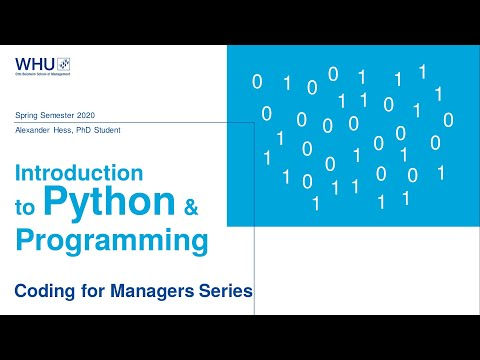

In [238]:
from IPython.display import YouTubeVideo
YouTubeVideo("nx2sCDoeC3I", width="60%")